In [1]:
def export_csv(perf):       
    with open("-".join(perf.labels) + ".csv", "w") as f:
        f.write(",".join(["n"] + perf.labels) + "\n")
        for n, t in zip(perf.n_range, perf.timings.T):
            lst = [str(n)] + [str(tt) for tt in t]
            f.write(",".join(lst) + "\n")

# Ufunc: math operations

## Element-wise operations on single `ndarray`

Output()

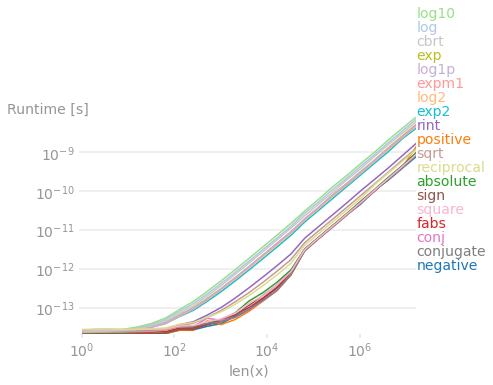

In [2]:
import numpy as np
import perfplot

labels = ["negative", "positive", "absolute", "fabs", "rint", "sign", "conj", "conjugate", "exp", "exp2", "log", "log2", "log10", "expm1", "log1p", "sqrt", "square", "cbrt", "reciprocal"]

out = perfplot.bench(
    setup=lambda n: np.random.rand(n),
    kernels=[
        lambda x: np.negative(x), # Numerical negative, element-wise.
        lambda x: np.positive(x), # Numerical positive, element-wise.
        lambda x: np.absolute(x), # Calculate the absolute value element-wise.
        lambda x: np.fabs(x), # Compute the absolute values element-wise.
        lambda x: np.rint(x), # Round elements of the array to the nearest integer.
        lambda x: np.sign(x), # Returns an element-wise indication of the sign of a number.
        lambda x: np.conj(x), # Return the complex conjugate, element-wise.
        lambda x: np.conjugate(x), # Return the complex conjugate, element-wise.
        lambda x: np.exp(x), # Calculate the exponential of all elements in the input array.
        lambda x: np.exp2(x), # Calculate 2**p for all p in the input array.
        lambda x: np.log(x), # Natural logarithm, element-wise.
        lambda x: np.log2(x), # Base-2 logarithm of x.
        lambda x: np.log10(x), # Return the base 10 logarithm of the input array, element-wise.
        lambda x: np.expm1(x), # Calculate exp(x) - 1 for all elements in the array.
        lambda x: np.log1p(x), # Return the natural logarithm of one plus the input array, element-wise.
        lambda x: np.sqrt(x), # Return the non-negative square-root of an array, element-wise.
        lambda x: np.square(x), # Return the element-wise square of the input.
        lambda x: np.cbrt(x), # Return the cube-root of an array, element-wise.
        lambda x: np.reciprocal(x), # Return the reciprocal of the argument, element-wise.
    ],
    labels=labels,
    n_range=[2 ** k for k in range(25)],
    xlabel="len(x)",
    equality_check=None
)
print(out)
export_csv(out)
out.show()

## Element-wise operations on two `ndarray`s

Output()

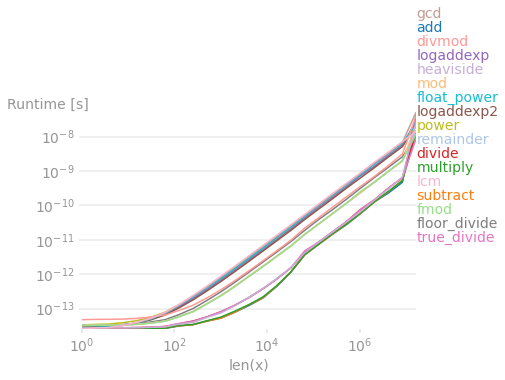

In [3]:
import numpy as np
import perfplot

labels = ["add", "subtract", "multiply", "divide", "logaddexp", "logaddexp2", "true_divide", "floor_divide", "power", "float_power", "remainder", "mod", "fmod", "divmod", "heaviside", "gcd", "lcm"]

out = perfplot.bench(
    setup=lambda n: (np.random.rand(n), np.random.rand(n),
                     np.random.randint(1_000_000, size=(n,)), np.random.randint(1_000_000, size=(n,))),
    kernels=[
        lambda x: np.add(*x[:2]), # Add arguments element-wise.
        lambda x: np.subtract(*x[:2]), # Subtract arguments, element-wise.
        lambda x: np.multiply(*x[:2]), # Multiply arguments element-wise.
        lambda x: np.divide(*x[:2]), # Returns a true division of the inputs, element-wise.
        lambda x: np.logaddexp(*x[:2]), # Logarithm of the sum of exponentiations of the inputs.
        lambda x: np.logaddexp2(*x[:2]), # Logarithm of the sum of exponentiations of the inputs in base-2.
        lambda x: np.true_divide(*x[:2]), # Returns a true division of the inputs, element-wise.
        lambda x: np.floor_divide(*x[:2]), # Return the largest integer smaller or equal to the division of the inputs.
        lambda x: np.power(*x[:2]), # First array elements raised to powers from second array, element-wise.
        lambda x: np.float_power(*x[:2]), # First array elements raised to powers from second array, element-wise.
        lambda x: np.remainder(*x[:2]), # Return element-wise remainder of division.
        lambda x: np.mod(*x[:2]), # Return element-wise remainder of division.
        lambda x: np.fmod(*x[:2]), # Return the element-wise remainder of division.
        lambda x: np.divmod(*x[:2]), # Return element-wise quotient and remainder simultaneously.
        lambda x: np.heaviside(*x[:2]), # Compute the Heaviside step function.

        lambda x: np.gcd(*x[2:4]), # Returns the greatest common divisor of |x1| and |x2|
        lambda x: np.lcm(*x[2:4]), # Returns the lowest common multiple of |x1| and |x2|
    ],
    labels=labels,
    n_range=[2 ** k for k in range(25)],
    xlabel="len(x)",
    equality_check=None
)
print(out)
export_csv(out)
out.show()

## Column/row-wise operations on two `ndarray`s

Output()

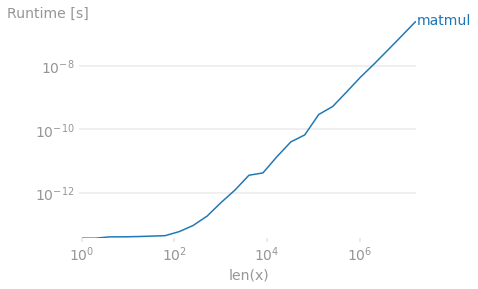

In [5]:
import numpy as np
import perfplot

labels = ["matmul"]

out = perfplot.bench(
    setup=lambda n: (np.random.rand(int(np.sqrt(n)), int(np.sqrt(n))),
                     np.random.rand(int(np.sqrt(n)), int(np.sqrt(n)))),
    kernels=[
        lambda x: np.matmul(*x), # Matrix product of two arrays.
    ],
    labels=labels,
    n_range=[2 ** k for k in range(25)],
    xlabel="len(x)",
    equality_check=None
)
print(out)
export_csv(out)
out.show()

# Ufunc: trigonometric functions

## Element-wise operations on single `ndarray`

Output()

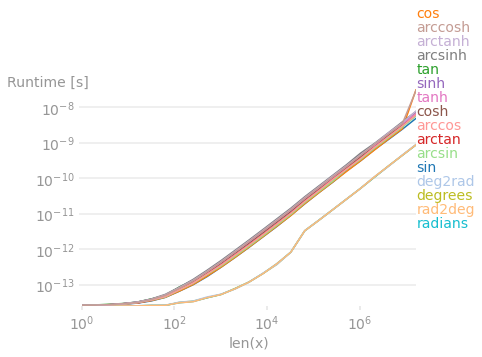

In [9]:
import numpy as np
import perfplot

labels = ["sin", "cos", "tan", "arctan", "sinh", "cosh", "tanh", "arcsinh", "degrees", "radians", "deg2rad", "rad2deg", "arcsin", "arccos", "arctanh", "arccosh"]

out = perfplot.bench(
    setup=lambda n: (np.random.rand(n), np.random.rand(n) + 1),
    kernels=[
        ### Domain real
        lambda x: np.sin(x[0]), # Trigonometric sine, element-wise.
        lambda x: np.cos(x[0]), # Cosine element-wise.
        lambda x: np.tan(x[0]), # Compute tangent element-wise.
        lambda x: np.arctan(x[0]), # Trigonometric inverse tangent, element-wise.
        lambda x: np.sinh(x[0]), # Hyperbolic sine, element-wise.
        lambda x: np.cosh(x[0]), # Hyperbolic cosine, element-wise.
        lambda x: np.tanh(x[0]), # Compute hyperbolic tangent element-wise.
        lambda x: np.arcsinh(x[0]), # Inverse hyperbolic sine element-wise.
        lambda x: np.degrees(x[0]), # Convert angles from radians to degrees.
        lambda x: np.radians(x[0]), # Convert angles from degrees to radians.
        lambda x: np.deg2rad(x[0]), # Convert angles from degrees to radians.
        lambda x: np.rad2deg(x[0]), # Convert angles from radians to degrees.

        ### Domain between -1 and 1
        lambda x: np.arcsin(x[0]), # Inverse sine, element-wise.
        lambda x: np.arccos(x[0]), # Trigonometric inverse cosine, element-wise.
        lambda x: np.arctanh(x[0]), # Inverse hyperbolic tangent element-wise.

        ### Domain between 1 and +inf
        lambda x: np.arccosh(x[1]), # Inverse hyperbolic cosine, element-wise.
    ],
    labels=labels,
    n_range=[2 ** k for k in range(25)],
    xlabel="len(x)",
    equality_check=None
)
print(out)
export_csv(out)
out.show()

Output()

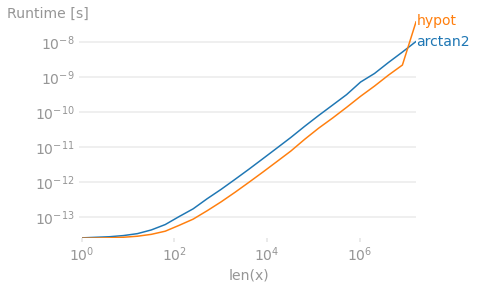

In [11]:
import numpy as np
import perfplot

labels = ["arctan2", "hypot"]

out = perfplot.bench(
    setup=lambda n: (np.random.rand(n), np.random.rand(n)),
    kernels=[
        lambda x: np.arctan2(*x), # Element-wise arc tangent of x1/x2 choosing the quadrant correctly.
        lambda x: np.hypot(*x), # Given the “legs” of a right triangle, return its hypotenuse.
    ],
    labels=labels,
    n_range=[2 ** k for k in range(25)],
    xlabel="len(x)",
    equality_check=None
)
print(out)
export_csv(out)
out.show()

# Ufunc: bit-twiddling functions

## Element-wise operations on single `ndarray`

Output()

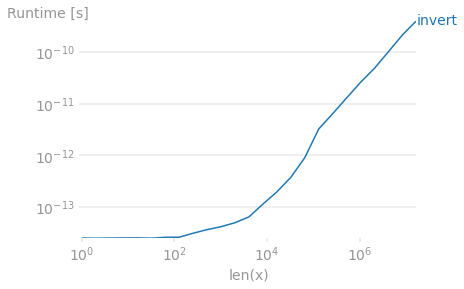

In [15]:
import numpy as np
import perfplot

labels = ["invert"]

out = perfplot.bench(
    setup=lambda n: (np.random.randint(1_000_000, size=(n,))),
    kernels=[
        lambda x: np.invert(x), # Compute bit-wise inversion, or bit-wise NOT, element-wise.
    ],
    labels=labels,
    n_range=[2 ** k for k in range(25)],
    xlabel="len(x)",
    equality_check=None
)
print(out)
export_csv(out)
out.show()

## Element-wise operations on two `ndarray`s

Output()

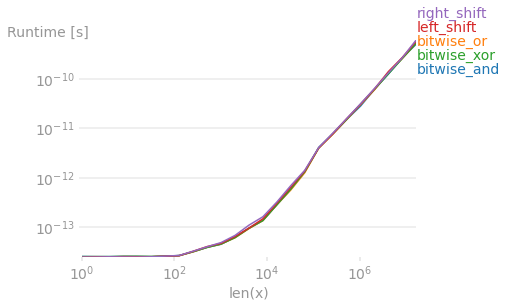

In [17]:
import numpy as np
import perfplot

labels = ["bitwise_and", "bitwise_or", "bitwise_xor", "left_shift", "right_shift"]

out = perfplot.bench(
    setup=lambda n: (np.random.randint(1_000_000, size=(n,)),
                     np.random.randint(1_000_000, size=(n,))),
    kernels=[
        lambda x: np.bitwise_and(*x), # Compute the bit-wise AND of two arrays element-wise.
        lambda x: np.bitwise_or(*x), # Compute the bit-wise OR of two arrays element-wise.
        lambda x: np.bitwise_xor(*x), # Compute the bit-wise XOR of two arrays element-wise.
        lambda x: np.left_shift(*x), # Shift the bits of an integer to the left.
        lambda x: np.right_shift(*x), # Shift the bits of an integer to the right.
    ],
    labels=labels,
    n_range=[2 ** k for k in range(25)],
    xlabel="len(x)",
    equality_check=None
)
print(out)
export_csv(out)
out.show()

# Ufunc: comparison functions

## Element-wise operations on single `ndarray`

Output()

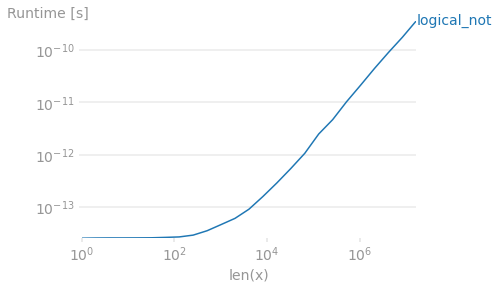

In [18]:
import numpy as np
import perfplot

labels = ["logical_not"]

out = perfplot.bench(
    setup=lambda n: (np.random.randint(1_000_000, size=(n,))),
    kernels=[
        lambda x: np.logical_not(x), # Compute the truth value of NOT x element-wise.
    ],
    labels=labels,
    n_range=[2 ** k for k in range(25)],
    xlabel="len(x)",
    equality_check=None
)
print(out)
export_csv(out)
out.show()

## Element-wise operations on two `ndarray`s

Output()

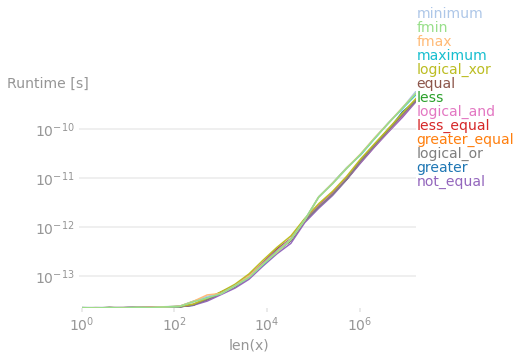

In [21]:
import numpy as np
import perfplot

labels = ["greater", "greater_equal", "less", "less_equal", "not_equal", "equal", "logical_and", "logical_or", "logical_xor", "maximum", "minimum", "fmax", "fmin"]

out = perfplot.bench(
    setup=lambda n: (np.random.randint(1_000_000, size=(n,)),
                     np.random.randint(1_000_000, size=(n,))),
    kernels=[
        lambda x: np.greater(*x), # Return the truth value of (x1 > x2) element-wise.
        lambda x: np.greater_equal(*x), # Return the truth value of (x1 >= x2) element-wise.
        lambda x: np.less(*x), # Return the truth value of (x1 < x2) element-wise.
        lambda x: np.less_equal(*x), # Return the truth value of (x1 <= x2) element-wise.
        lambda x: np.not_equal(*x), # Return (x1 != x2) element-wise.
        lambda x: np.equal(*x), # Return (x1 == x2) element-wise.
        lambda x: np.logical_and(*x), # Compute the truth value of x1 AND x2 element-wise.
        lambda x: np.logical_or(*x), # Compute the truth value of x1 OR x2 element-wise.
        lambda x: np.logical_xor(*x), # Compute the truth value of x1 XOR x2, element-wise.
        lambda x: np.maximum(*x), # Element-wise maximum of array elements.
        lambda x: np.minimum(*x), # Element-wise minimum of array elements.
        lambda x: np.fmax(*x), # Element-wise maximum of array elements.
        lambda x: np.fmin(*x), # Element-wise minimum of array elements.
    ],
    labels=labels,
    n_range=[2 ** k for k in range(25)],
    xlabel="len(x)",
    equality_check=None
)
print(out)
export_csv(out)
out.show()

# Ufunc: floating functions

## Element-wise operations on single `ndarray`

Output()

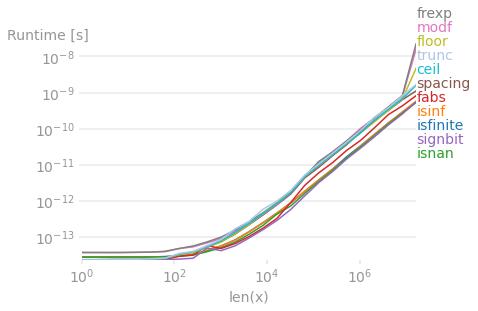

In [26]:
import numpy as np
import perfplot

labels = ["isfinite", "isinf", "isnan", "fabs", "signbit", "spacing", "modf", "frexp", "floor", "ceil", "trunc"]

out = perfplot.bench(
    setup=lambda n: np.random.rand(n),
    kernels=[
        lambda x: np.isfinite(x), # Test element-wise for finiteness (not infinity or not Not a Number).
        lambda x: np.isinf(x), # Test element-wise for positive or negative infinity.
        lambda x: np.isnan(x), # Test element-wise for NaN and return result as a boolean array.
        lambda x: np.fabs(x), # Compute the absolute values element-wise.
        lambda x: np.signbit(x), # Returns element-wise True where signbit is set (less than zero).
        lambda x: np.spacing(x), # Return the distance between x and the nearest adjacent number.
        lambda x: np.modf(x), # Return the fractional and integral parts of an array, element-wise.
        lambda x: np.frexp(x), # Decompose the elements of x into mantissa and twos exponent.
        lambda x: np.floor(x), # Return the floor of the input, element-wise.
        lambda x: np.ceil(x), # Return the ceiling of the input, element-wise.
        lambda x: np.trunc(x), # Return the truncated value of the input, element-wise.
    ],
    labels=labels,
    n_range=[2 ** k for k in range(25)],
    xlabel="len(x)",
    equality_check=None
)
print(out)
export_csv(out)
out.show()

## Element-wise operations on two `ndarray`s

Output()

/home/xilinx/perf_env/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in ldexp
  if sys.path[0] == '':
/home/xilinx/perf_env/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in fmod
  del sys.path[0]


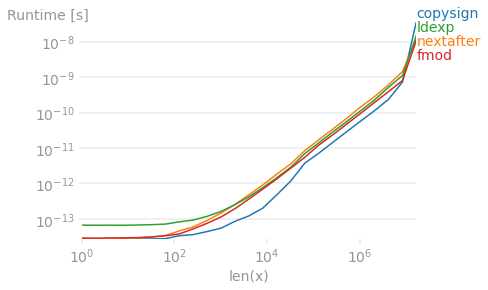

In [30]:
import numpy as np
import perfplot

labels = ["copysign", "nextafter", "ldexp", "fmod"]

out = perfplot.bench(
    setup=lambda n: (np.random.rand(n), np.random.rand(n),
                     np.random.randint(1_000_000, size=(n,)), np.random.randint(1_000_000, size=(n,))),
    kernels=[
        lambda x: np.copysign(*x[:2]), # Change the sign of x1 to that of x2, element-wise.
        lambda x: np.nextafter(*x[:2]), # Return the next floating-point value after x1 towards x2, element-wise.
        lambda x: np.ldexp(*x[1:3]), # Returns x1 * 2**x2, element-wise.
        lambda x: np.fmod(*x[2:4]), # Return the element-wise remainder of division.
    ],
    labels=labels,
    n_range=[2 ** k for k in range(25)],
    xlabel="len(x)",
    equality_check=None
)
print(out)
export_csv(out)
out.show()

# `numpy.fft`

Output()

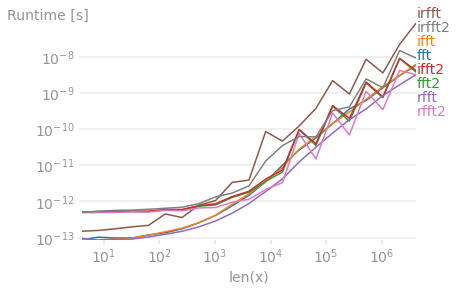

In [3]:
import numpy as np
import perfplot

labels = ["fft", "ifft", "fft2", "ifft2", "rfft", "irfft", "rfft2", "irfft2"]

out = perfplot.bench(
    setup=lambda n: (np.random.rand(n),
                     np.random.rand(int(np.sqrt(n)), int(np.sqrt(n)))),
    kernels=[
        lambda x: np.fft.fft(x[0]), # Compute the one-dimensional discrete Fourier Transform.
        lambda x: np.fft.ifft(x[0]), # Compute the one-dimensional inverse discrete Fourier Transform.
        lambda x: np.fft.fft2(x[1]), # Compute the 2-dimensional discrete Fourier Transform.
        lambda x: np.fft.ifft2(x[1]), # Compute the 2-dimensional inverse discrete Fourier Transform.
        lambda x: np.fft.rfft(x[0]), # Compute the one-dimensional discrete Fourier Transform for real input.
        lambda x: np.fft.irfft(x[0]), # Computes the inverse of rfft.
        lambda x: np.fft.rfft2(x[1]), # Compute the 2-dimensional FFT of a real array.
        lambda x: np.fft.irfft2(x[1]), # Computes the inverse of rfft2.
    ],
    labels=labels,
    n_range=[2 ** k for k in range(2, 23)],
    xlabel="len(x)",
    equality_check=None
)
print(out)
export_csv(out)
out.show()

## `numpy.linalg`

## Matrix and vector products

Output()

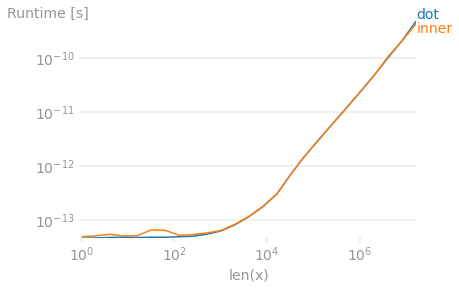

In [3]:
import numpy as np
import perfplot

labels = ["dot", "inner"]

out = perfplot.bench(
    setup=lambda n: (np.random.rand(n), np.random.rand(n), 
                     np.random.rand(int(np.sqrt(n)), int(np.sqrt(n)))),
    kernels=[
        lambda x: np.dot(*x[:2]), # Dot product of two arrays.
        lambda x: np.inner(*x[:2]), # Inner product of two arrays.
    ],
    labels=labels,
    n_range=[2 ** k for k in range(25)],
    xlabel="len(x)",
    equality_check=None
)
print(out)
export_csv(out)
out.show()

Output()

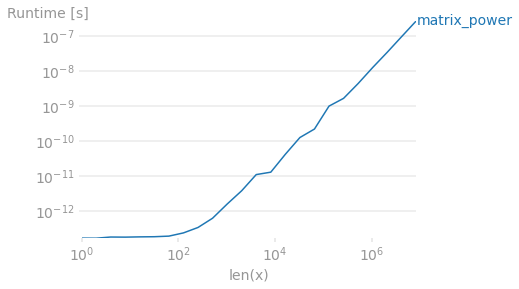

In [2]:
import numpy as np
import perfplot

labels = ["matrix_power"]

out = perfplot.bench(
    setup=lambda n: np.random.rand(int(np.sqrt(n)), int(np.sqrt(n))),
    kernels=[
        lambda x: np.linalg.matrix_power(x, 5), # Raise a square matrix to the (integer) power n.    
    ],
    labels=labels,
    n_range=[2 ** k for k in range(24)],
    xlabel="len(x)",
    equality_check=None
)
print(out)
export_csv(out)
out.show()

# Mathematical functions

## Miscellaneous

Output()

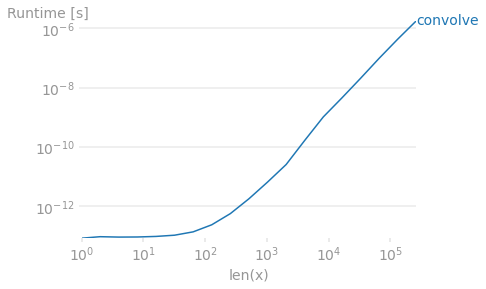

In [2]:
import numpy as np
import perfplot

labels = ["convolve"]

out = perfplot.bench(
    setup=lambda n: (np.random.rand(n), np.random.rand(n)),
    kernels=[
        lambda x: np.convolve(*x), # Returns the discrete, linear convolution of two one-dimensional sequences.
    ],
    labels=labels,
    n_range=[2 ** k for k in range(19)],
    xlabel="len(x)",
    equality_check=None
)
print(out)
export_csv(out)
out.show()